In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data  = pd.read_csv('C:\\Users\\youse\\Downloads\\cancer dataset.csv')

#data = data.drop('id',axis=1)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)

# Check for outliers in all columns
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    print(f"Number of outliers in {column}: ", len(outliers))


# Normalizing the data
scaler = StandardScaler()
# fit and transform the data
data_normalized = pd.DataFrame(scaler.fit_transform(data.drop('id', axis=1)), columns=data.columns.drop('id'))

# add the diagnosis column back to the normalized data
data_normalized['diagnosis'] = data['diagnosis']

# Find the value count of 1 (Malignant) and 0 (Benign) in the 'diagnosis' column
diagnosis_counts = data_normalized['diagnosis'].value_counts()

# Print the counts
print(diagnosis_counts)

data_normalized.head()

Missing values in each column:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Number of duplicate rows:  

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


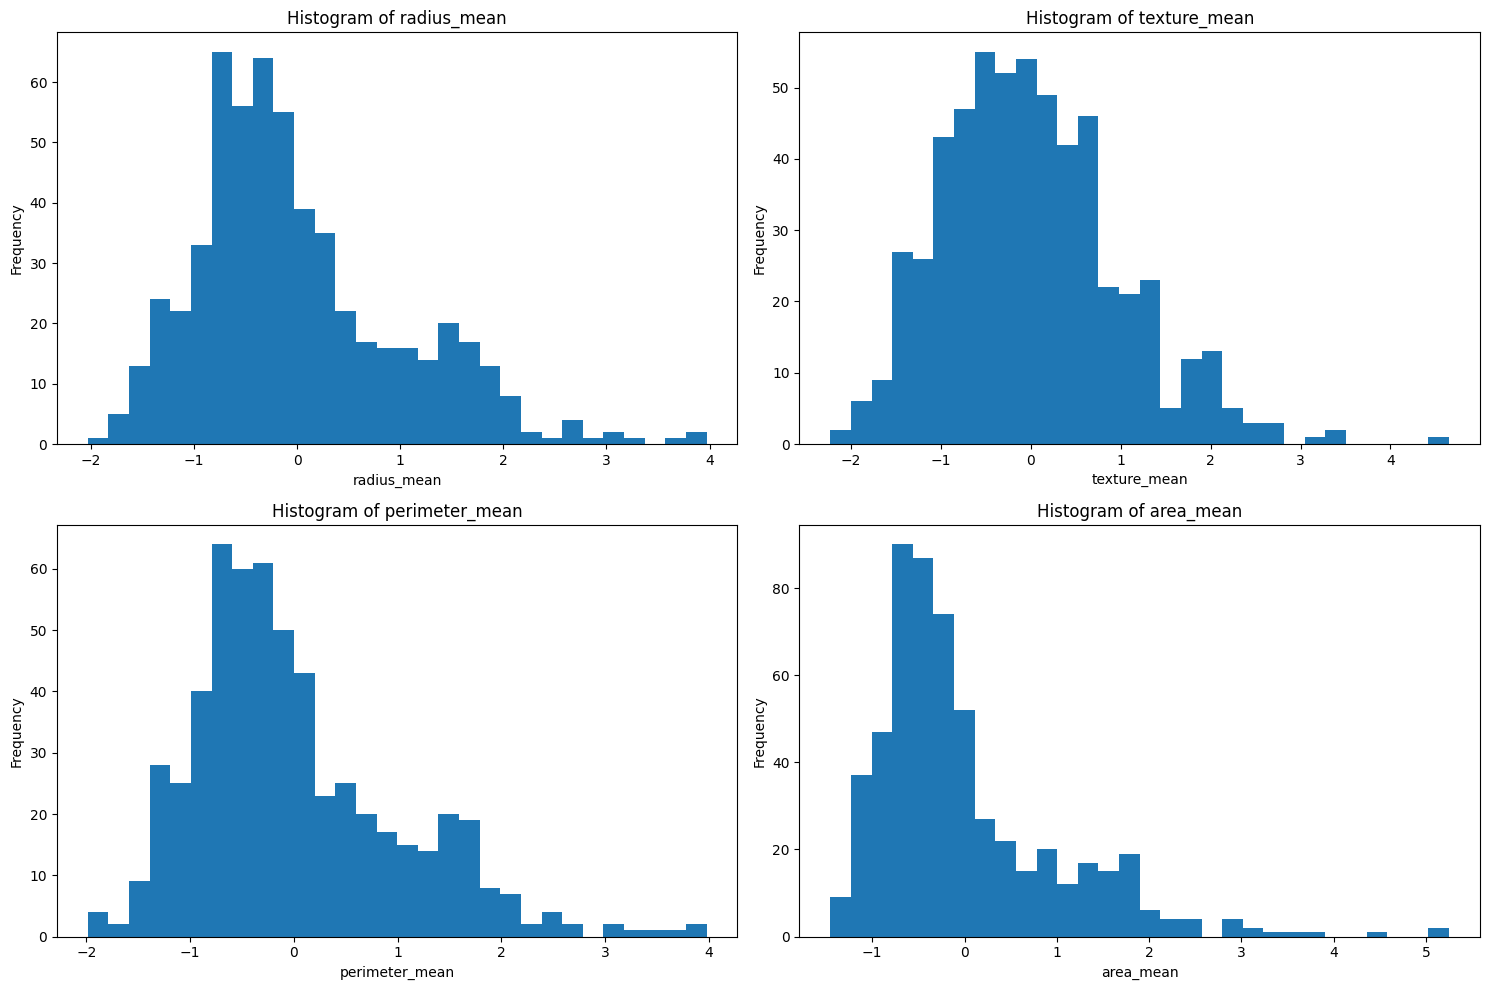

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histogram for 'radius_mean'
axs[0, 0].hist(data_normalized['radius_mean'], bins=30)
axs[0, 0].set_title('Histogram of radius_mean')
axs[0, 0].set_xlabel('radius_mean')
axs[0, 0].set_ylabel('Frequency')

# Histogram for 'texture_mean'
axs[0, 1].hist(data_normalized['texture_mean'], bins=30)
axs[0, 1].set_title('Histogram of texture_mean')
axs[0, 1].set_xlabel('texture_mean')
axs[0, 1].set_ylabel('Frequency')

# Histogram for 'perimeter_mean'
axs[1, 0].hist(data_normalized['perimeter_mean'], bins=30)
axs[1, 0].set_title('Histogram of perimeter_mean')
axs[1, 0].set_xlabel('perimeter_mean')
axs[1, 0].set_ylabel('Frequency')

# Histogram for 'area_mean'
axs[1, 1].hist(data_normalized['area_mean'], bins=30)
axs[1, 1].set_title('Histogram of area_mean')
axs[1, 1].set_xlabel('area_mean')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

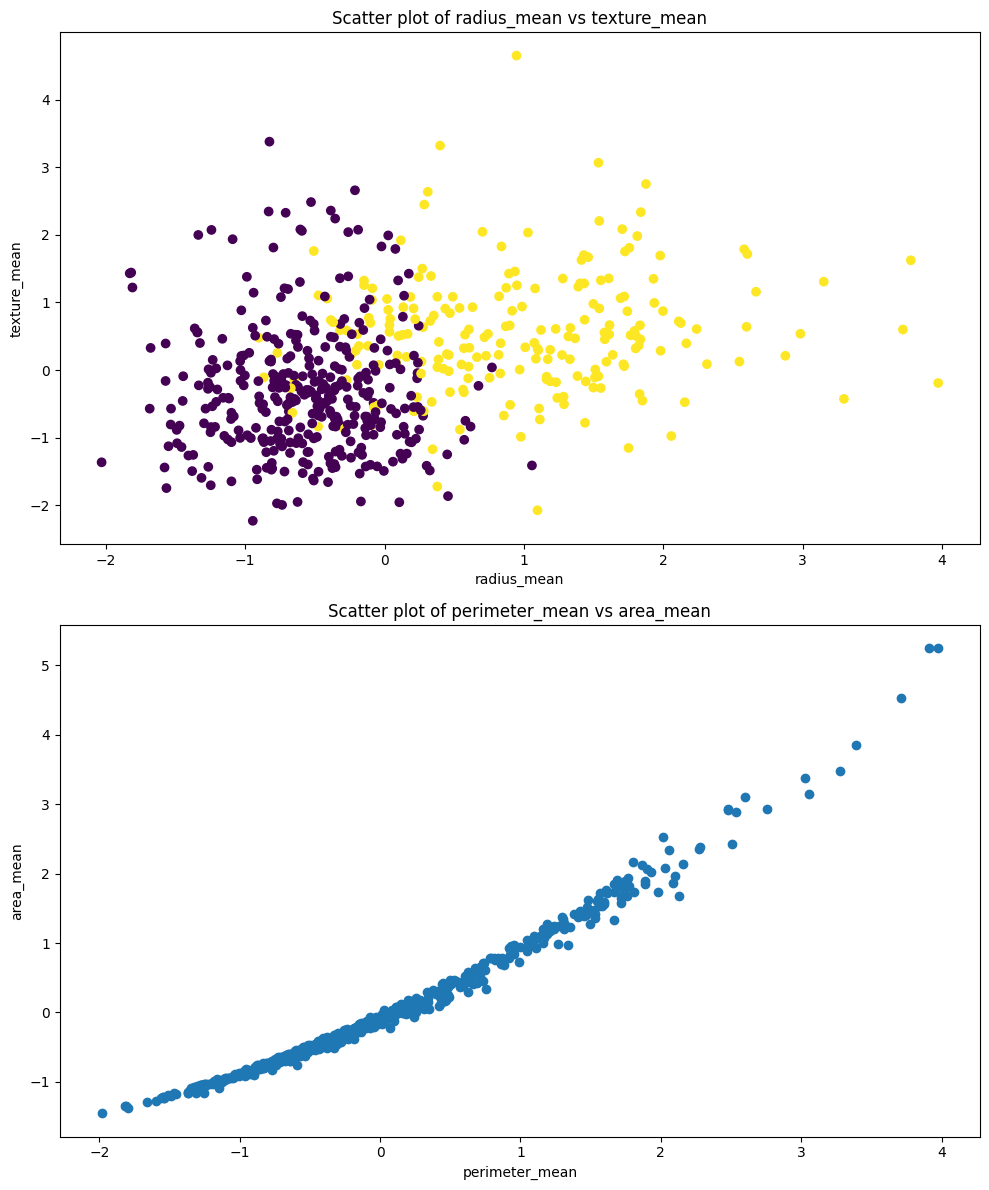

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Scatter plot of 'radius_mean' vs 'texture_mean'
axs[0].scatter(data_normalized['radius_mean'], data_normalized['texture_mean'], c=data_normalized['diagnosis'])
axs[0].set_title('Scatter plot of radius_mean vs texture_mean')
axs[0].set_xlabel('radius_mean')
axs[0].set_ylabel('texture_mean')

# Scatter plot of 'perimeter_mean' vs 'area_mean'
axs[1].scatter(data_normalized['perimeter_mean'], data_normalized['area_mean'])
axs[1].set_title('Scatter plot of perimeter_mean vs area_mean')
axs[1].set_xlabel('perimeter_mean')
axs[1].set_ylabel('area_mean')

plt.tight_layout()
plt.show()

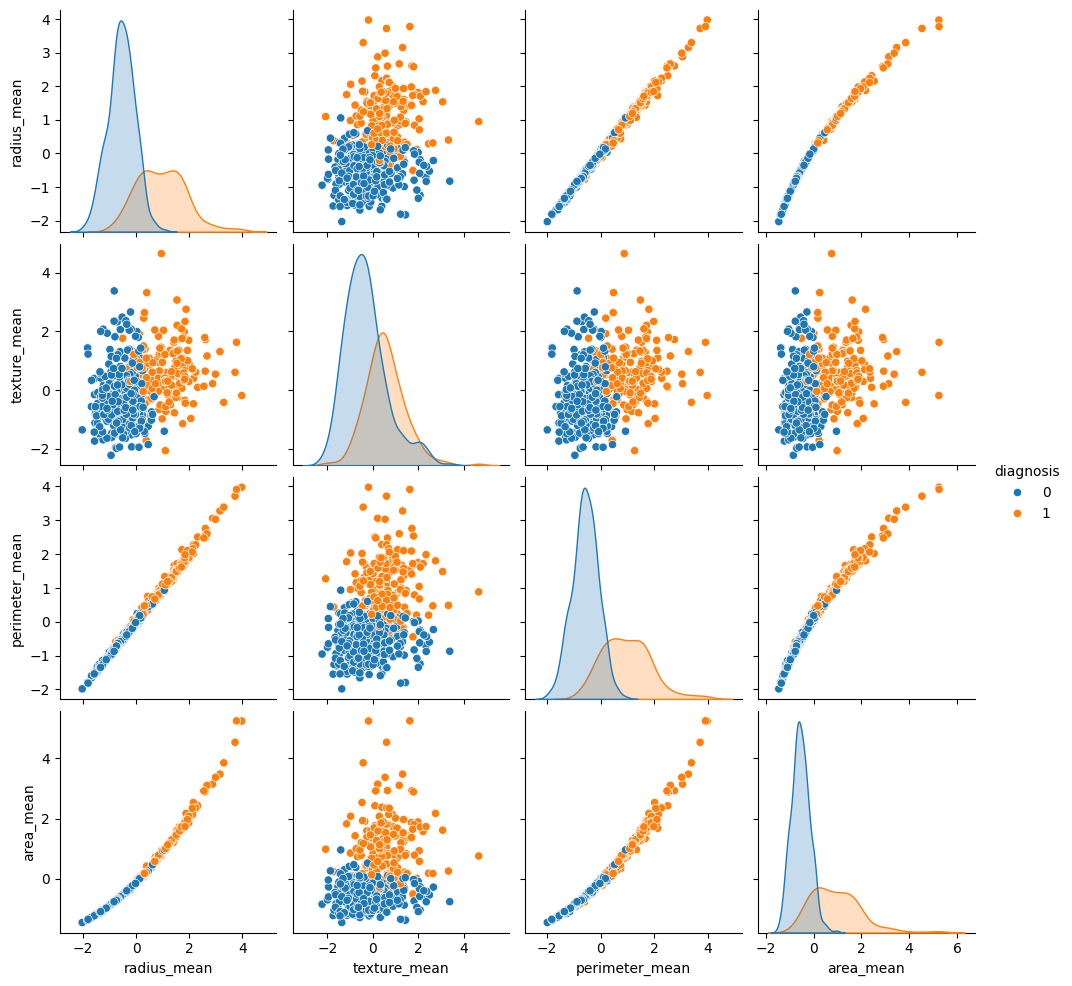

In [5]:
# Creating a pairplot
import seaborn as sns

# Select the first 5 columns
first_five_columns = data_normalized.columns[:5]

# Create a pairplot
sns.pairplot(data_normalized[first_five_columns], hue='diagnosis')

plt.show()

In [6]:
# Compute the correlation matrix
corr_matrix = data_normalized.corr()

# Display the correlation matrix
print(corr_matrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

In [7]:
# Create a set to hold the correlated features
corr_features = set()

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  # if correlation coefficient is greater than 0.8
            colname = corr_matrix.columns[i]  # get the name of the column
            corr_features.add(colname)

# Drop the correlated features from the dataframe
data_normalized = data_normalized.drop(corr_features, axis=1)

In [8]:
# Compute the correlation matrix
corr_matrix = data_normalized.corr()

# Strongly correlated quantities
strong_corr = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]

# Weakly correlated quantities
weak_corr = corr_matrix[(corr_matrix > -0.5) & (corr_matrix < 0.5)]

# Negatively correlated quantities
negative_corr = corr_matrix[corr_matrix < 0]


# Display the weakly, negatively, and strongly correlated quantities
print("Strongly correlated quantities:\n", strong_corr)
print("Weakly correlated quantities:\n", weak_corr)
print("Negatively correlated quantities:\n", negative_corr)

Strongly correlated quantities:
                         diagnosis  radius_mean  texture_mean  smoothness_mean  \
diagnosis                1.000000     0.730029           NaN              NaN   
radius_mean              0.730029     1.000000           NaN              NaN   
texture_mean                  NaN          NaN           1.0              NaN   
smoothness_mean               NaN          NaN           NaN         1.000000   
compactness_mean         0.596534     0.506124           NaN         0.659123   
symmetry_mean                 NaN          NaN           NaN         0.557775   
fractal_dimension_mean        NaN          NaN           NaN         0.584792   
radius_se                0.567134     0.679090           NaN              NaN   
texture_se                    NaN          NaN           NaN              NaN   
smoothness_se                 NaN          NaN           NaN              NaN   
compactness_se                NaN          NaN           NaN              Na

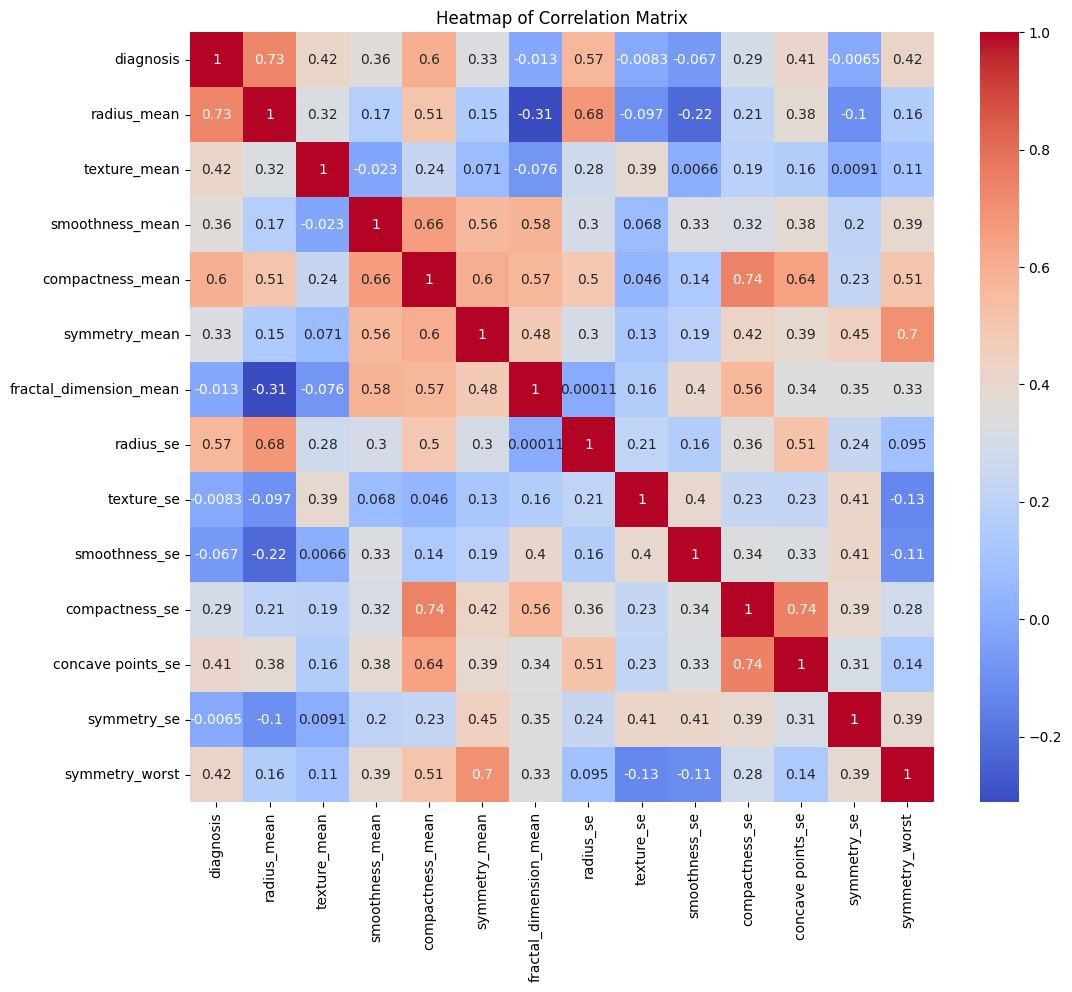

In [9]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

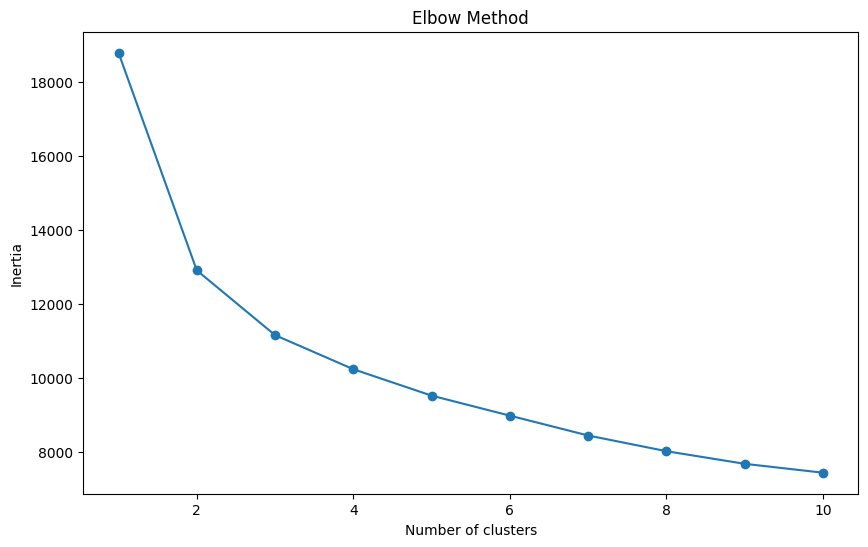

In [50]:
#apply data mining technique (K-Means Clustering) to the dataset 1st algorithm

# Normalizing the data
scaler = StandardScaler()

# fit and transform the data
data_normalized = pd.DataFrame(scaler.fit_transform(data.drop('id', axis=1)), columns=data.columns.drop('id'))

# add the diagnosis column back to the normalized data
data_normalized['diagnosis'] = data['diagnosis']


scaled_data = scaler.fit_transform(data)

# Determine the number of clusters (k) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [51]:



# Apply K-Means Clustering with the chosen number of clusters
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster information back to the original data
data['cluster'] = clusters

#print the results
print(data.groupby('cluster').mean())  # get the mean values of features for each cluster


                   id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
cluster                                                                       
0        2.415119e+07   0.070423    12.421637     18.169352       79.711155   
1        5.113635e+07   1.000000    20.017723     22.169703      132.824257   
2        3.135511e+07   0.761062    14.220867     20.234956       93.961681   

           area_mean  smoothness_mean  compactness_mean  concavity_mean  \
cluster                                                                   
0         486.336620         0.091457          0.073875        0.039581   
1        1263.128713         0.102834          0.158210        0.194767   
2         640.764602         0.105979          0.151905        0.148708   

         concave points_mean  ...  radius_worst  texture_worst  \
cluster                       ...                                
0                   0.024847  ...     13.738327      23.955972   
1                   0.109548  

In [52]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
kmeans = KMeans(n_clusters=3).fit(data_normalized)

labels_kmeans = kmeans.labels_
print("K-Means Silhouette Score: ", silhouette_score(data_normalized, labels_kmeans))
print("K-Means Davies-Bouldin Score: ", davies_bouldin_score(data_normalized, labels_kmeans))


K-Means Silhouette Score:  0.3274030232961758
K-Means Davies-Bouldin Score:  1.475181221044845


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                   id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
cluster                                                                       
0        7.628931e+07   0.859155    14.947415     20.596549       98.162958   
1        1.181767e+07   0.002959    12.205462     17.930592       78.371272   
2        2.757437e+07   1.000000    20.117416     22.365843      133.727528   

           area_mean  smoothness_mean  compactness_mean  concavity_mean  \
cluster                                                                   
0         712.545070         0.101706          0.133340        0.132987   
1         466.864497         0.092178          0.076674        0.040323   
2        1276.969663         0.103712          0.163146        0.202399   

         concave points_mean  ...  radius_worst  texture_worst  \
cluster                       ...                                
0                   0.066140  ...     17.685599      28.262746   
1                   0.024833  

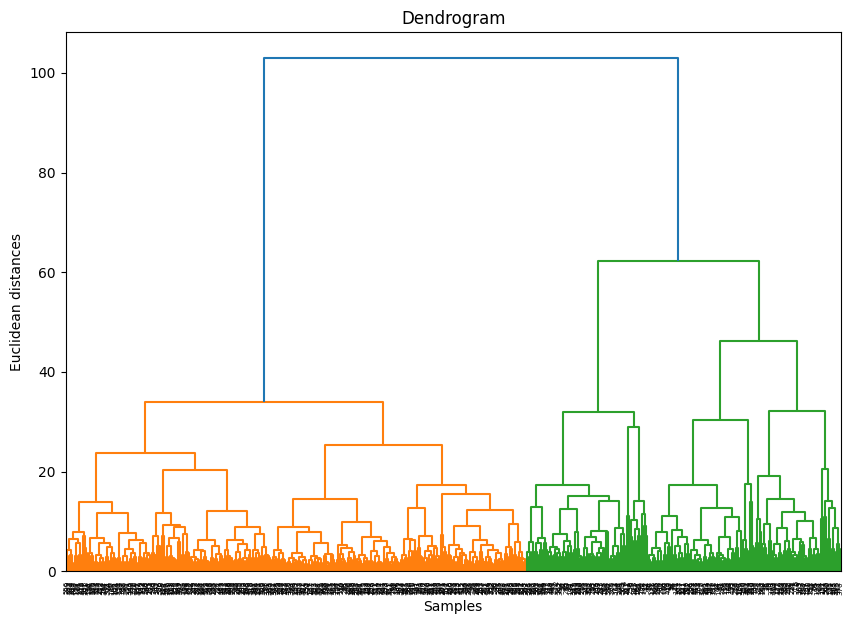

In [49]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Apply Hierarchical Clustering 2nd Algorithm
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(scaled_data)

# Add cluster information back to the original data
data['cluster'] = clusters

# print the results
print(data.groupby('cluster').mean())  # get the mean values of features for each cluster

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [54]:
agglo = AgglomerativeClustering(n_clusters=3).fit(data_normalized)

labels_agglo = agglo.labels_ 

print("Agglomerative Clustering Silhouette Score: ", silhouette_score(data_normalized, labels_agglo))
print("Agglomerative Clustering Davies-Bouldin Score: ", davies_bouldin_score(data_normalized, labels_agglo))

Agglomerative Clustering Silhouette Score:  0.2787594337275736
Agglomerative Clustering Davies-Bouldin Score:  1.6193138711374633


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
data.iloc[:,1]=labelencoder_Y.fit_transform(data.iloc[:,1].values)

In [ ]:
X=data.iloc[:,2:31].values #features that help us determine if patient has cancer or not
Y=data.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#normalise the data
scaler = MinMaxScaler()
dataset_normalised = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Assuming df is your DataFrame and 'target' is the column with the dependent variable
features = dataset_normalised.drop('diagnosis', axis=1)
target = dataset_normalised['diagnosis']

# Split the data into training and test sets (30% of data used for testing)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)


#classify the data
classifier = KNeighborsClassifier()
classifier.fit(features_train, target_train)
y_pred = classifier.predict(features_test)

#print the accuracy and confusion matrix
print("Accuracy: ", accuracy_score(target_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(target_test, y_pred))

Acuracy:  1.0
Confusion matrix: 
 [[108   0]
 [  0  63]]


In [ ]:
def logreg (X_train, Y_train):
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression (random_state=0)
    log.fit(features_train, target_train)
    print("Logistic Regression Training Accuracy:", log.score(X_train, Y_train))
    return log

In [ ]:
logrex=logreg(features_train, target_train)

Logistic Regression Training Accuracy: 0.9874371859296482
